In [1]:
import requests
from IPython.core.display import HTML

In [2]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# TensorFlow and tf.keras
import tensorflow as tf

%matplotlib inline

In [3]:
TITLE_FONTSIZE  = 14
AXIS_LABEL_SIZE = 12

<a id="contents"></a>

## Notebook Contents
  
  - [Overview and Data Description](#intro)
  - [Questions](#questions)
  - [Solutions](#solutions)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<a id="intro"></a>

<h2> Overview and Data Description </h2>
<br /><br />
    
[Return to contents](#contents)

<br /><br />
In this problem, you will be building and interpreting models to predict whether a flight was delayed for its arrival based on features that could be measured as the flight takes off.  
We will also estimate the predictive intervals of the model using bootstrapping. We will utilize those predictive intervals to build a new kind of model: a model that refrains from making a prediction when it is not confident.  


The included variables are:
<br /><br />
**ARRIVAL_DELAY**: the difference between scheduled arrival and actual arrival, in minutes (positive is late, negative is early).
<br /><br />
**DISTANCE**: the distance between arrival and departure airports, in miles.
<br /><br />
**SCHEDULED_TIME**: the flight's scheduled travel time.
<br /><br />
**MONTH**: the month the flight took off, 1 = January, 2 = February, etc.
<br /><br />
**SCHED_DEP_HOUR**: the scheduled departure time (the hour of the day).
<br /><br />
**SCHED_ARR_HOUR**: the scheduled arrival time (the hour of the day).
<br /><br />
**FLIGHT_COUNT**: the number of flights flying out of that airport before noon on a typical day.
<br /><br />
**DAY_OF_WEEK**: the day of the week, 1 = Monday, 2 = Tuesday, etc.
<br /><br />
**ORIGIN_AIRPORT**: the airport the flight took off from.
<br /><br />
**DESTINATION_AIRPORT**: the airport the flight was scheduled to land at.
<br /><br />
For the airport codes, see: https://www.bts.gov/topics/airlines-and-airports/world-airport-codes

To sucessfully complete this part, you will proceed by fitting a NN model, evaluating its accuracy, interpreting the predictors' importance, and finally evaluating the predictive intervals.
<br /><br />
**NOTE:** The observations were sampled so that roughly half of the observations were delayed and half of the observations were not delayed.

</div> 

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<a id="questions"></a>

<h2>Questions</h2> 
<br /><br />
    
[Return to contents](#contents)

<br /><br />
**1.1**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). This is going to be the response variable for the rest of this question. 
<br /><br />
**1.2** Preprocess the data: one-hot-encode the non-numeric categorical variables, deal with missing values if there are any, scale your data, and split the data into training and test sets (use an 80/20 split with `random_state=111`). Print the resulting shapes of your $X$ and $y$ dataframes for both your train and your test sets.
<br /><br />
**2.** Fit an artificial neural network model using all predictors (name this model `NN_model`).  Use a dense feed-forward network with two hidden layers with 15 nodes in each hidden layer. For this network, use appropriate activation functions for each layer, select an appropriate loss function and optimizer, specify a validation split of 0.2, train for an appropriate number of epochs based on the results of your training and validation accuracy plot, and feel free to use the default batch size while training. Plot the training accuracy and validation accuracy as a function of epochs from your `NN_model` training history. Evaluate the `NN_model` model on both train and test, and print out the resulting train and test accuracies.
<br /><br />
**3.** To begin our interpretation of the resulting `NN_model`, we will first use a "proxy model" that we know how to interpret and train it on our `NN_model` training predictions.

<br /><br />
- **3.1** For this we need to modify our training set. First, generate a set of `NN_model` class predictions for the training set. These training predictions will be used to form a revised training dataset for our proxy model: (a) use all of the same $X$ values used by `NN_model` for our $X$ train and (b) replace the actual response values $y$ with the predicted $\hat{y}$ values generated by the fitted `NN_model`.

<br /><br />
- **3.2** Next, fit a logistic regression model using your revised training dataset from 3.1 (name this model `logreg`). Use ridge-like regularization. Print the `logreg` test accuracy to confirm that it is similar to what we saw for our `NN_model` test accuracy in question 2. You may need to adjust `C` in order to achieve a similar accuracy.

<br /><br />
- **3.3** Now use sklearn's `permutation_importance` class (already included in this notebook's imports) to compute the feature importance using the `logreg` model.
<br />
  - Read the official documentation for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature.) as well as [here](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) to learn how it works.
<br />
  - You can use the default number of `n_repeats` and your estimator's default `scorer`. To speed up the time it takes to run your permutations, you can try setting `n_jobs=-1` to take full advantage of all of your available processor cores.
<br />
  - Measure the **relative** variable importance (i.e. as a proportion of the variable importance of the most important variable identified by `permutation_importance`) and generate a barplot illustrating the relative variable importances for the top-10 most important predictors identified using `permutation_importance`.
<br /><br />

**4.** Another way to interpret the  `NN_model` is by examining the response as a function of any of the predictors. Particularly, we will select from features often found most significant from the analysis above. **For all plots below**, for ease of interpretation, **please be certain to** display all predictors on their original scales. 
<br /><br />

   - **4.1** Set all predictors to their means/modes except for `SCHED_DEP_HOUR`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` on the data from the **training set**. Interpret what you see in 2-4 sentences.
<br /><br />
 
   - **4.2** Set all predictors to their means/modes except for `SCHED_DEP_HOUR` and `FLIGHT_COUNT`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `FLIGHT_COUNT` from the training set.

<br /><br />
   - **4.3**   Set all predictors to their means/modes except for except for `SCHED_DEP_HOUR` and `SCHED_ARR_HOUR`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `SCHED_ARR_HOUR` from the training set.

<br /><br />
   - **4.4** Set all predictors to their means/modes except for except for `SCHED_DEP_HOUR` and `DISTANCE`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `DISTANCE` from the training set. 
<br /><br />

  - **4.5** In 5-10 sentences, interpret what you have seen in 4.2, 4.3, and 4.4.
<br /><br />
**HINT:** For 4.2, 4.3, and 4.4, when you include `SCHED_DEP_HOUR` on one axis and your second predictor on the other axis, you can color your datapoints based on their corresponding predicted probabilities by using  the `c` and `cmap` arguments in `plt.scatter`. You can also add a labeled colorbar to your plot to make clear what those colors mean. Please refer to the matplotlib documentation for examples.
<br /><br />
    
**5.**
    
<br /><br />
In this part, we will attempt to do model inference. Neural Networks have too many parameters, and therefore inference on all the parameters is intractable and meaningless. 
<br /><br />
Using the same network architecture as `NN_model` (layers, nodes, activations, etc.) and your scaled data from that model, create multiple training sets using bootstrapping and fit a separate neural network model to each bootstrapped set of data (a minimum of at least 50 bootstraps should be used). Predict the output on the test data for each model. Randomly select 8 test observations and on 8 subplots, plot the distribution of predicted probabilities (i.e. $n$ bootstrapped probabilites) with the 95% CI bounds clearly marked and reported in each subplot and the actual class of each observation included in each subplot's title for easy reference.
    <br /><br />
Interpret what you see in 3-5 sentences.
<br /><br />
    
**NOTE:** The code for this problem can take an extremely long time to execute. Please feel free to use the provided `progressbar` function below to visually track the progress of your bootstraps.
    
<br /><br />
    
**6.**
    
<br /><br />
Using the probability distribution of the predictions obtained from the bootstrapped samples above, we can evaluate how "significant" our bagged (i.e. bootstrap-aggregated) prediction will be for each test observation.
<br /><br />
To accomplish this, you will first calculate the ratio of bootstrapped probabilities that cross the threshold value of $\hat{p}=0.5$. Let's call this ratio the **Posterior Prediction Ratio (PPR)**. When a bagged prediction's $PPR=0$, all predictions are compatible (i.e. all bootstrapped probabilities for that test observation are on the same side of $\hat{p}=0.5$). Likewise, when the $PPR=0.5$, half of the bootstrapped predictions for that test observation are $\hat{y}=0$, and the other half are $\hat{y}=1$. After calculating your $PPR$ values for all test observations, you should have $n=2000$ $PPR$ values (i.e. one for each test observation).
<br /><br />
Next, to get more accurate predictions, we can create an **abstain** model that will abstain from making a prediction for a particular observation if some defined threshold for significance (i.e. maximum $PPR$ value) is not met. (If you'd like to learn more about abstain models, you can read more [here](https://openreview.net/forum?id=rJxF73R9tX).)
<br /><br />
Let's explore how your resulting test accuracies might change by using your bootstrapped prediction results from question 5 for an **abstain bagging model** (i.e. a bootstrap aggregated model where some test observations are simply not predicted based on a given $PPR$ threshold). You can make your abstain model *stricter* by using smaller $PPR$ threshold values.
<br /><br />
- Print the test accuracy for your **bagging model** predictions from question 5 using predictions for all 2,000 of our test observations. 
<br /><br />
- Plot the test accuracies for an **abstain bagging model** using your predictions from question 5 as a function of increasing $PPR$.
<br /><br />
- Also, plot the proportion of test observations not abstained (i.e. the proportion of those predicted) for your **abstain bagging model** as a function of increasing $PPR$.
<br /><br />
- Interpret what you see in 3-5 sentences.
<br /><br />
    
**NOTE**: You should observe that as $PPR$ decreases (more confident predictions), you must also compromise on the number of points that your abstain model predicts confidently. 

</div>

<a id="solutions"></a>

## Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.**    

**1.1**

</div>

In [4]:
# read in the dataset
df = pd.read_csv('flights.csv')

# create response variable DELAY_OR_NOT, dtype is bool
DELAY_OR_NOT = (df[['ARRIVAL_DELAY']] >= 15)

# replace True/False with 1/0
DELAY_OR_NOT.replace([True,False], [1,0], inplace=True)

# rename the response Series
DELAY_OR_NOT.rename({'ARRIVAL_DELAY':'DELAY_OR_NOT'}, axis=1, inplace=True)

# drop the response column in original df
df.drop('ARRIVAL_DELAY', axis=1, inplace=True)

# take a look at the response
print(DELAY_OR_NOT.head())


   DELAY_OR_NOT
0             1
1             0
2             0
3             1
4             1


<div class='exercise-r'>  

**1.2**
    
</div>

In [5]:
# delete all missing values (by row)
df.dropna(axis=0,how='any',inplace=True)

# get all non-numeric columns
# NOTE do day_of_week/month count as non-numeric categorical variables?
non_numeric_cols = [
    # 'MONTH', 
    # 'DAY_OF_WEEK', 
    'ORIGIN_AIRPORT',
    'DESTINATION_AIRPORT']
# non_numeric_cols = df.select_dtypes(exclude='number').columns

# one-hot-encode the non-numeric columns, frop the first column
one_hot_df = pd.get_dummies(df[non_numeric_cols], columns=non_numeric_cols, drop_first=True)

# get all numeric columns
numeric_cols = df.columns.drop(non_numeric_cols)

# scale the numeric data with StandardScaler
scaler = StandardScaler()
std_array = scaler.fit_transform(df[numeric_cols])      # this method returns an array
std_df = pd.DataFrame(std_array, columns=numeric_cols)  # convert array into dataframe

# get predictors by concating one_hot_df with std_df
X = pd.concat([std_df, one_hot_df], axis=1)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, DELAY_OR_NOT, test_size=0.2, random_state=111)

# print the resulting shapes of dataframe for both train and test sets
print(f'shape of train perdictor: {X_train.shape}')
print(f'shape of train response : {y_train.shape}')
print(f'shape of test  perdictor: {X_test.shape}')
print(f'shape of test  response : {y_test.shape}')


shape of train perdictor: (8000, 808)
shape of train response : (8000, 1)
shape of test  perdictor: (2000, 808)
shape of test  response : (2000, 1)


<div class='exercise-r'>  
    
**2.**
    
</div>

In [6]:
# define my NN_model
NN_model = tf.keras.Sequential()

# add 2 hidden layer as requested
NN_model.add(tf.keras.layers.Dense(15, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(tf.keras.layers.Dense(15, activation='relu'))

# add output layer, use sigmoid as output activation
NN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    # output layer


In [7]:
EPOCHS  = 6
LOSS_   = 'binary_crossentropy' # tf.keras.losses.BinaryCrossentropy()
OPTMZ_  = 'adam'                # tf.keras.optimizers.SGD()
METRIC_ = ['accuracy']

# compile the model
NN_model.compile(
    loss = LOSS_,
    optimizer = OPTMZ_,
    metrics = METRIC_
)

# fit the model
history = NN_model.fit(
    x = X_train,
    y = y_train,
    epochs = EPOCHS,
    validation_split = 0.2,
    verbose = 0
)


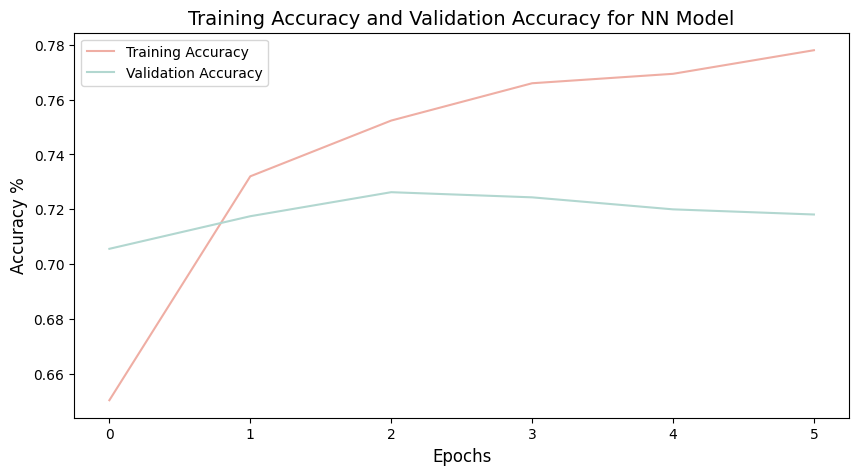

In [8]:
# plot train and val acc as a function of epochs
fig = plt.figure(num=1, figsize = (10,5))
ax = fig.gca()
ax.plot(history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
ax.plot(history.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs', fontsize=AXIS_LABEL_SIZE)
ax.set_ylabel('Accuracy %', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Training Accuracy and Validation Accuracy for NN Model', fontsize = TITLE_FONTSIZE)
fig.show()


In [9]:
# evaluate NN_model on train and test dataset
pred_train = NN_model.predict(X_train, verbose=0)
pred_test = NN_model.predict(X_test, verbose=0)

# print accuracy score (use .round() to get classes)
print("NN_model train auccuracy:", accuracy_score(y_train.values.reshape((-1,)), pred_train.round().reshape((-1,))))
print("NN_model test  auccuracy:", accuracy_score(y_test.values.reshape((-1,)), pred_test.round().reshape((-1,))))

# print ROC accuracy score
print("NN_model train roc_accuracy:", roc_auc_score(y_train, pred_train))
print("NN_model test  roc_accuracy:", roc_auc_score(y_test, pred_test))


NN_model train auccuracy: 0.775625
NN_model test  auccuracy: 0.7145
NN_model train roc_accuracy: 0.853520594465603
NN_model test  roc_accuracy: 0.7762703352178311


<div class='exercise-r'>

**3.**

</div>

In [10]:
# generate a set of NN_model class predictions for the training set
pred_class = pred_train.round()

# fit a logistic regression model using revised training dataset
logreg = LogisticRegression(
    C = 50,
    penalty = 'l2',
    solver = 'liblinear')
logreg.fit(X_train, pred_class.reshape((-1,)))

# evaluate logreg on test dataset
pred_test_logreg_proba = logreg.predict_proba(X_test)
pred_test_logreg = logreg.predict(X_test)

# print ROC accuracy score and accuracy score
print(f'Logreg test accuracy: {accuracy_score(y_test, pred_test_logreg)}')
print(f'Logreg test roc_accuracy: {roc_auc_score(y_test, pred_test_logreg_proba[:,1])}')


Logreg test accuracy: 0.721
Logreg test roc_accuracy: 0.786175703485237


In [11]:
# calculates the feature importance of estimators for a given dataset
feature_importance = permutation_importance(
    estimator = logreg, # trained model
    X = X_test,         # validation input
    y = y_test,         # validation output
    n_repeats = 10,     # the number of times a feature is randomly shuffled and returns a sample of feature importances
    n_jobs = -1,        # the number of local cores it use
)


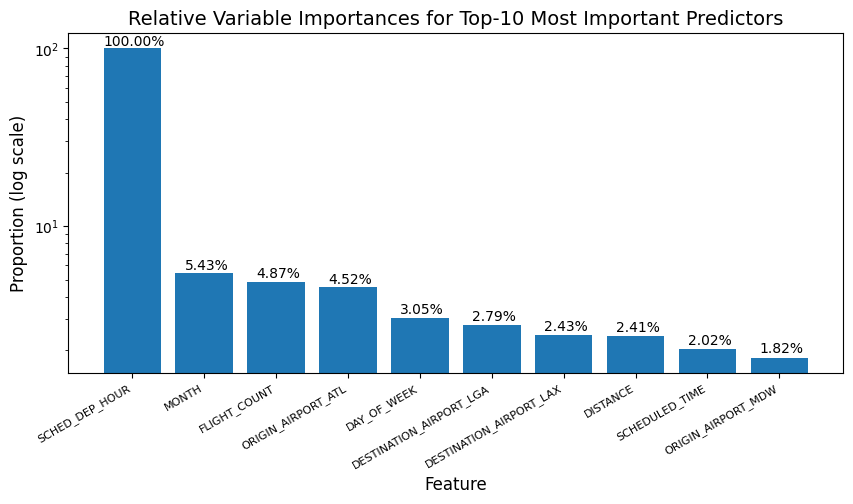

In [12]:
# get importances in the order of features
importances = feature_importance.importances_mean

# measure the relative variable
max_importance = max(importances)
r_importances = np.array([im/max_importance*100 for im in importances])

# get sorted index based on importances value
im_index_sorted = r_importances.argsort()[::-1]

# plot a barchart to illustrate the top-10 relative variable importances
x_data = np.linspace(1,10,10)
y_data = r_importances[im_index_sorted[0:10]]

fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title('Relative Variable Importances for Top-10 Most Important Predictors', fontsize=TITLE_FONTSIZE)
ax.set_xlabel('Feature', fontsize=AXIS_LABEL_SIZE)
ax.set_xticks(x_data,X_test.columns[im_index_sorted[0:10]], fontsize=8)
ax.set_yscale('log')
ax.set_ylabel('Proportion (log scale)',fontsize=AXIS_LABEL_SIZE)
ax.bar(x_data, y_data)

for x,y in zip(x_data,y_data):
    ax.text(x+0.03,y+0.05,'%.2f'%y+'%',ha='center',va='bottom')
    
fig.autofmt_xdate()
fig.show()


<div class='exercise-r'>

**4.**    

**4.1**

</div>

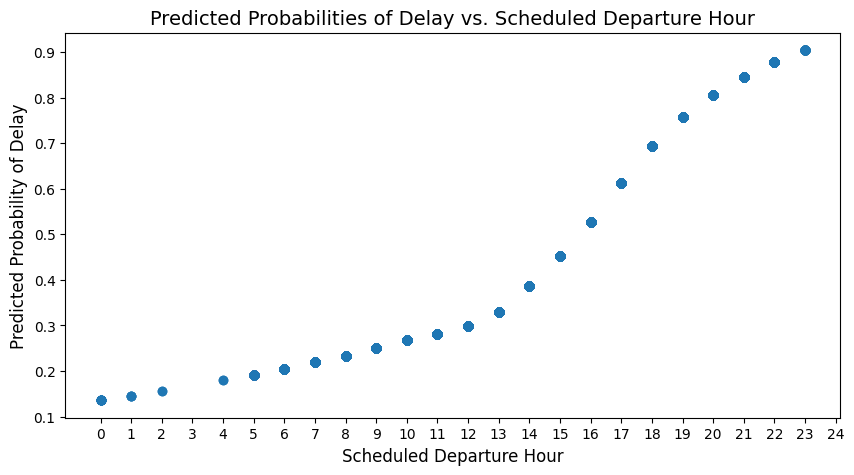

In [13]:
# get means of numeric predictors and modes of one-hot predictors
X_train_all_mean = X_train.mean()
X_train_onehot_mode = X_train[one_hot_df.columns].mode().iloc[0]

# set all the predictors except SCHED_DEP_HOUR to their mean/mode
X_train_1 = X_train.copy()
X_train_1[X_train_all_mean.index] = X_train_all_mean
X_train_1[X_train_onehot_mode.index] = X_train_onehot_mode
X_train_1['SCHED_DEP_HOUR'] = X_train['SCHED_DEP_HOUR']

# predict delay with modified training set
pred_train_1 = NN_model.predict(X_train_1, verbose=0)

# get SCHED_DEP_HOUR data which are on original scale
x_origin = pd.DataFrame(data=df['SCHED_DEP_HOUR'], index=X_train_1.index)

# plot the predicted probabilities of delay vs. SCHED_DEP_HOUR
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title('Predicted Probabilities of Delay vs. Scheduled Departure Hour',fontsize=TITLE_FONTSIZE)
ax.set_xlabel('Scheduled Departure Hour', fontsize=AXIS_LABEL_SIZE)
ax.set_xticks(np.linspace(0,24,25))
ax.set_ylabel('Predicted Probability of Delay', fontsize=AXIS_LABEL_SIZE)
ax.scatter(x_origin, pred_train_1)

fig.show()


**INTERPRETATION:**

The graph shows a relationship between DELAY and SCHEDUELED DEPARTURE HOUR. We set all other predictors to mean to isolate the effect of SCHED_DEP_HOUR on DELAY, while keeping all other predictors constant. This is based on the assumption that SCHED_DEP_HOUR has a greater effect, in other words, more important, to DELAY; otherwise, we might not get a obvious pattern from the graph.

<div class='exercise-r'>

**4.2**
</div>

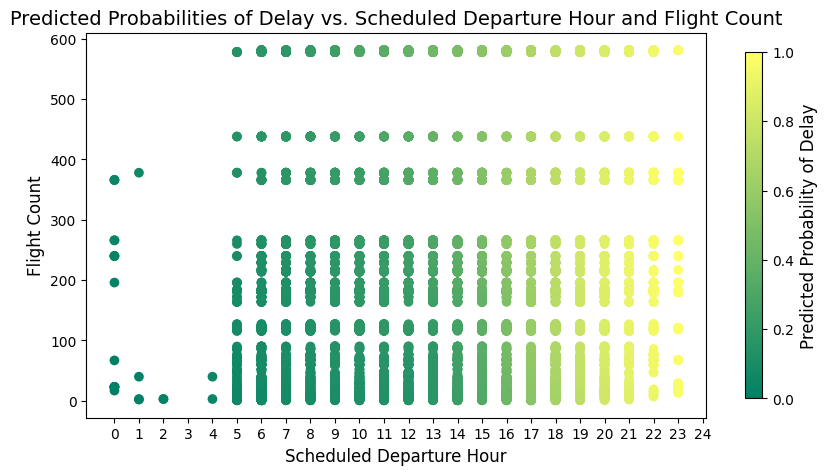

In [14]:
# set all the predictors except SCHED_DEP_HOUR and FLIGHT_COUNT to their mean/mode
X_train_2 = X_train.copy()
X_train_2[X_train_all_mean.index] = X_train_all_mean
X_train_2[X_train_onehot_mode.index] = X_train_onehot_mode
X_train_2['SCHED_DEP_HOUR'] = X_train['SCHED_DEP_HOUR']
X_train_2['FLIGHT_COUNT'] = X_train['FLIGHT_COUNT']

# predict delay with modified training set
pred_train_2 = NN_model.predict(X_train_2, verbose=0)

# get SCHED_DEP_HOUR and FLIGHT_COUNT data which are on original scale
x_origin = pd.DataFrame(data=df['SCHED_DEP_HOUR'], index=X_train_2.index)
y_origin = pd.DataFrame(data=df['FLIGHT_COUNT'], index=X_train_2.index)

# plot the predicted probabilities of delay vs. SCHED_DEP_HOUR and FLIGHT_HOUR
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title('Predicted Probabilities of Delay vs. Scheduled Departure Hour and Flight Count', fontsize=TITLE_FONTSIZE)
ax.set_xlabel('Scheduled Departure Hour', fontsize=AXIS_LABEL_SIZE)
ax.set_xticks(np.linspace(0,24,25))
ax.set_ylabel('Flight Count', fontsize=AXIS_LABEL_SIZE)
ax.scatter(x_origin, y_origin, c=pred_train_2, cmap='summer')
clb = fig.colorbar(plt.cm.ScalarMappable(cmap='summer'), ax=ax, shrink=.9)
clb.set_label('Predicted Probability of Delay', fontsize=AXIS_LABEL_SIZE)

fig.show()


<div class='exercise-r'>

**4.3**
    
</div>

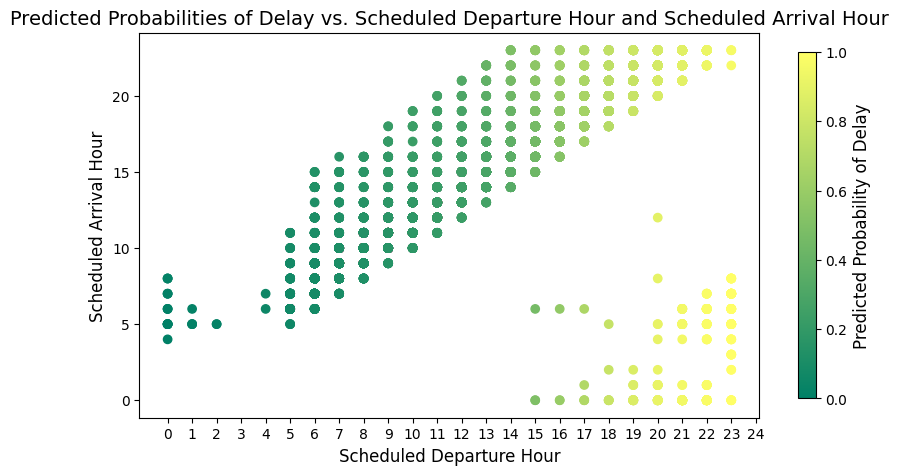

In [15]:
# set all the predictors except SCHED_DEP_HOUR and SCHED_ARR_HOUR to their mean/mode
X_train_3 = X_train.copy()
X_train_3[X_train_all_mean.index] = X_train_all_mean
X_train_3[X_train_onehot_mode.index] = X_train_onehot_mode
X_train_3['SCHED_DEP_HOUR'] = X_train['SCHED_DEP_HOUR']
X_train_3['SCHED_ARR_HOUR'] = X_train['SCHED_ARR_HOUR']

# predict delay with modified training set
pred_train_3 = NN_model.predict(X_train_3, verbose=0)

# get SCHED_DEP_HOUR and SCHED_ARR_HOUR data which are on original scale
x_origin = pd.DataFrame(data=df['SCHED_DEP_HOUR'], index=X_train_3.index)
y_origin = pd.DataFrame(data=df['SCHED_ARR_HOUR'], index=X_train_3.index)

# plot the predicted probabilities of delay vs. SCHED_DEP_HOUR and SCHED_ARR_HOUR
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title('Predicted Probabilities of Delay vs. Scheduled Departure Hour and Scheduled Arrival Hour', fontsize=TITLE_FONTSIZE)
ax.set_xlabel('Scheduled Departure Hour', fontsize=AXIS_LABEL_SIZE)
ax.set_xticks(np.linspace(0,24,25))
ax.set_ylabel('Scheduled Arrival Hour', fontsize=AXIS_LABEL_SIZE)
ax.scatter(x_origin, y_origin, c=pred_train_3, cmap='summer')
clb = fig.colorbar(plt.cm.ScalarMappable(cmap='summer'), ax=ax, shrink=.9)
clb.set_label('Predicted Probability of Delay', fontsize=AXIS_LABEL_SIZE)

fig.show()


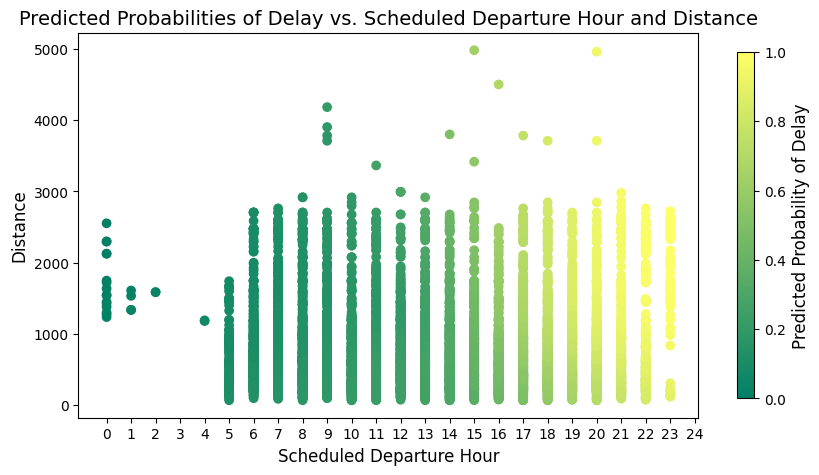

In [16]:
# set all the predictors except SCHED_DEP_HOUR and DISTANCE to their mean/mode
X_train_4 = X_train.copy()
X_train_4[X_train_all_mean.index] = X_train_all_mean
X_train_4[X_train_onehot_mode.index] = X_train_onehot_mode
X_train_4['SCHED_DEP_HOUR'] = X_train['SCHED_DEP_HOUR']
X_train_4['DISTANCE'] = X_train['DISTANCE']

# predict delay with modified training set
pred_train_4 = NN_model.predict(X_train_4, verbose=0)

# get SCHED_DEP_HOUR and DISTANCE data which are on original scale
x_origin = pd.DataFrame(data=df['SCHED_DEP_HOUR'], index=X_train_4.index)
y_origin = pd.DataFrame(data=df['DISTANCE'], index=X_train_4.index)

# plot the predicted probabilities of delay vs. SCHED_DEP_HOUR and DISTANCE
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title('Predicted Probabilities of Delay vs. Scheduled Departure Hour and Distance', fontsize=TITLE_FONTSIZE)
ax.set_xlabel('Scheduled Departure Hour', fontsize=AXIS_LABEL_SIZE)
ax.set_xticks(np.linspace(0,24,25))
ax.set_ylabel('Distance', fontsize=AXIS_LABEL_SIZE)
ax.scatter(x_origin, y_origin, c=pred_train_4, cmap='summer')
clb = fig.colorbar(plt.cm.ScalarMappable(cmap='summer'), ax=ax, shrink=.9)
clb.set_label('Predicted Probability of Delay', fontsize=AXIS_LABEL_SIZE)

fig.show()


**INTERPRETATION:**

In all models from 1.4.2 to 1.4.4, we assumed that SCHED_DEP_HOUR was the most important predictor for DELAY_OR_NOT. We then tested each model to see if any other predictors held a relatively higher importance among all predictors except SCHED_DEP_HOUR. By plotting the probability of DELAY vs. SCHED_DEP_HOUR and a second predictor, we could determine if the second predictor had a significant effect on DELAY. However, in all the graphs, DELAY was only positively related to SCHED_DEP_HOUR: the later the SCHED_DEP_HOUR, the higher the probability of DELAY

<div class='exercise-r'>

**5.**

</div>

In [17]:
def progressbar(n_step, n_total):
    """Prints self-updating progress bar to stdout to track for-loop progress
    
    There are entire 3rd-party libraries dedicated to custom progress-bars.
    A simple function like this is often more than enough to get the job done.
    
    :param n_total: total number of expected for-loop iterations
    :type n_total: int
    :param n_step: current iteration number, starting at 0
    :type n_step: int

    .. example::
    
        for i in range(n_iterations):
            progressbar(i, n_iterations)
            
    .. source:
    
        This function is a simplified version of code found here:
        https://stackoverflow.com/questions/3160699/python-progress-bar/15860757#15860757
    """
    n_step = n_step + 1
    barlen = 50
    progress = n_step / n_total
    block = int(round(barlen * progress))
    status = ""
    if n_step == n_total:
        status = "Done...\r\n\n"
    text = "\r [{0}] {1}/{2} {3}".format(
        "=" * block + "-" * (barlen - block),
        n_step,
        n_total,
        status,
    )
    sys.stdout.write(text)
    sys.stdout.flush()

In [18]:
%%time

# set a max round for bootstrapping
MAX_BOOTSTRAP = 50

# save predictions and histories in seperate lists
histories   = []
evaluations = []
predictions = []

# start bootstrapping and training
for cnt in range(MAX_BOOTSTRAP):
    # use progress bar to show current progress
    progressbar(cnt, MAX_BOOTSTRAP)

    # define my new_model with the same architectures
    new_model = tf.keras.Sequential()
    new_model.add(tf.keras.layers.Dense(15, input_dim=X_train.shape[1], activation='relu'))
    new_model.add(tf.keras.layers.Dense(15, activation='relu'))
    new_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    new_model.compile(  # compile the model
        loss = LOSS_,
        optimizer = OPTMZ_,
        metrics = METRIC_
    )
    
    # create new training set using bootstrapping
    X_train_bstrap, y_train_bstrap = resample(X_train, y_train) #,n_samples=int(X_train.shape[0]/MAX_BOOTSTRAP))

    # fit the model with new training set
    new_history = new_model.fit(
        x = X_train_bstrap,
        y = y_train_bstrap,
        epochs = EPOCHS,
        validation_split = 0.2,
        verbose = 0
    )
    histories.append(new_history)

    # get predictions on fixed X test
    new_pred_test = new_model.predict(X_test, verbose = 0)
    predictions.append(new_pred_test)

    # get evaluation result on fixed X test
    new_eval_test = new_model.evaluate(X_test, y_test, verbose = 0)
    evaluations.append(new_eval_test)
    
    # delete this model
    del new_model


 [==================================================] 50/50 Done...

CPU times: user 2min 53s, sys: 9.42 s, total: 3min 2s
Wall time: 2min 58s


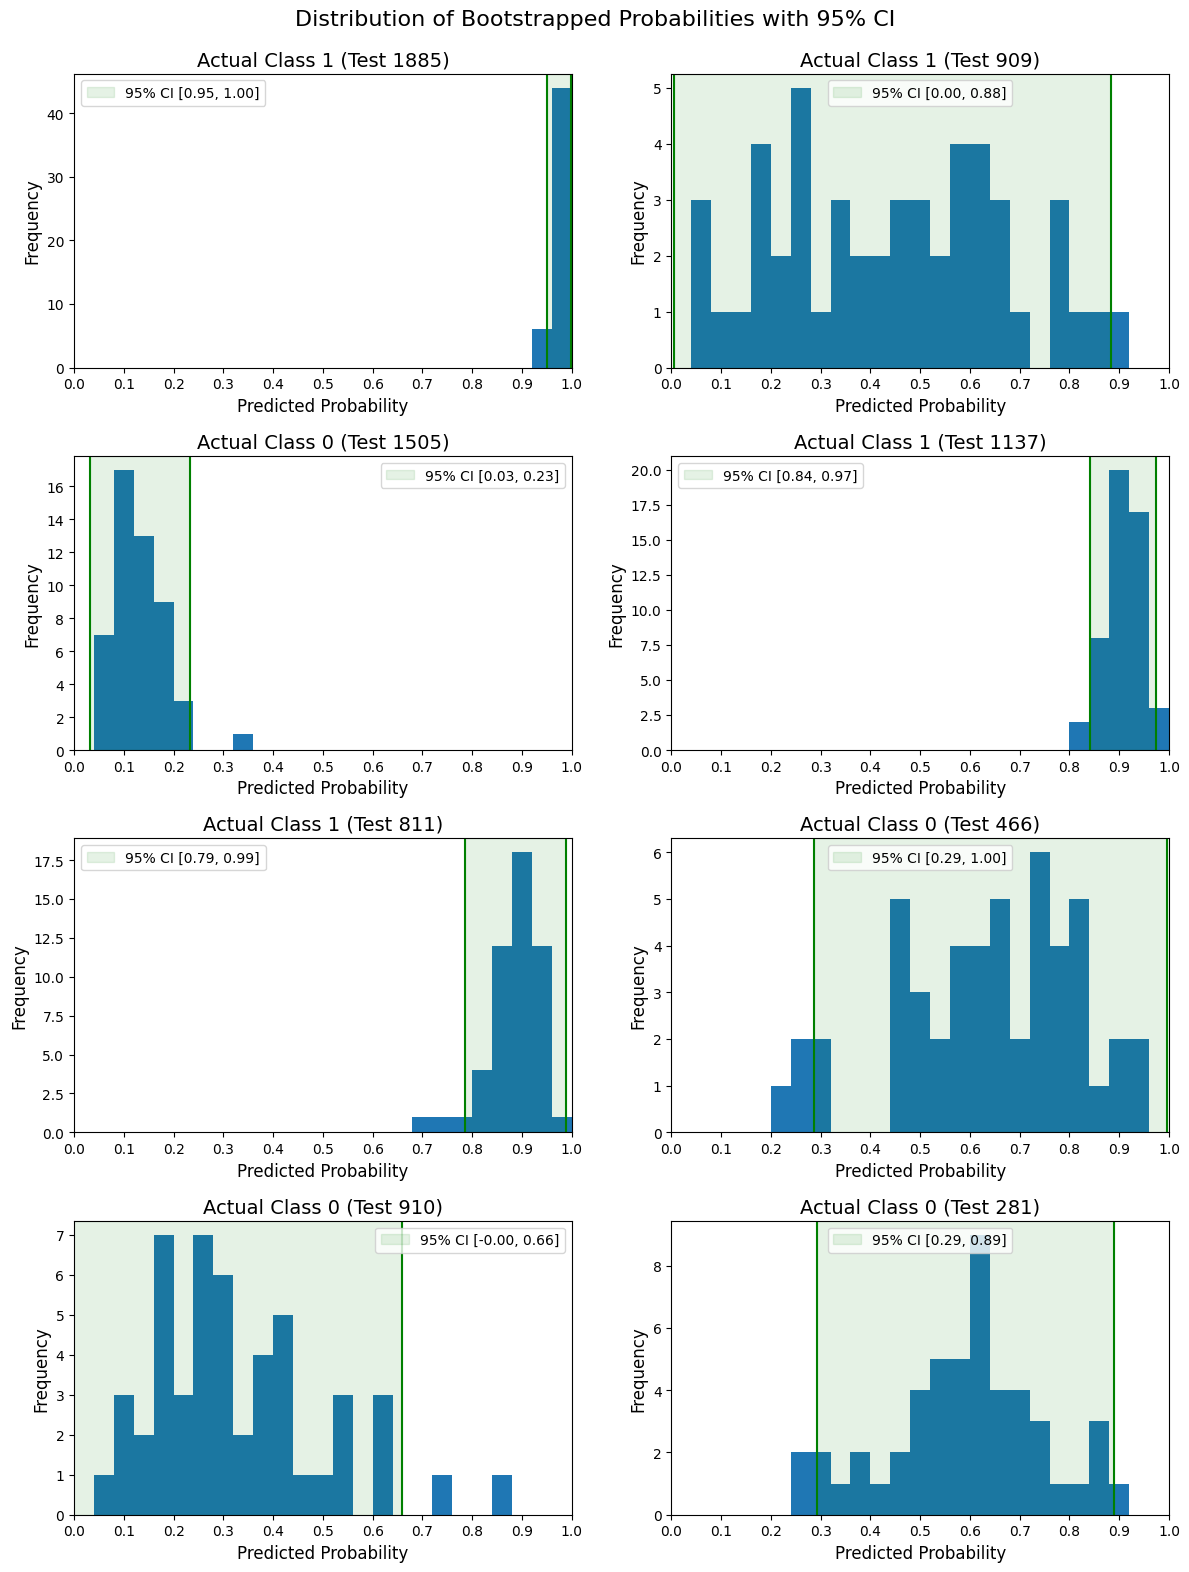

In [19]:
# randomly generate 8 indexs for y_test
indexs = np.random.choice(len(y_test.index),8,replace=False)

# plot 8 subplots
fig, axs = plt.subplots(4,2,figsize=(12,16))

for i in range(0,8):
    ax = axs[i//2][i%2]

    # get predicted probabilities of y_text[indexs[i]]
    y_data = [predictions[p][indexs[i]][0] for p in range(0, MAX_BOOTSTRAP)]

    # calculate confidence interval
    y_mean = np.mean(y_data)
    y_std = np.std(y_data)
    low_CI_bound  = y_mean - 1.96*y_std
    high_CI_bound = y_mean + 1.96*y_std
    
    # plot the distribution of predicted probabilities
    t_str = f'Actual Class {y_test.iloc[indexs[i]].values[0]} (Test {indexs[i]})'
    ax.set_title(t_str, fontsize=TITLE_FONTSIZE)
    ax.set_xlabel('Predicted Probability', fontsize=AXIS_LABEL_SIZE)
    ax.set_xticks(np.linspace(0,1,11))
    ax.set_xlim(xmin=0, xmax=1)
    ax.set_ylabel('Frequency', fontsize=AXIS_LABEL_SIZE)
    ax.hist(y_data, bins=25, range=(0,1))

    # plot confidence interval
    ax.axvline(high_CI_bound, color='g')#,label=f'high bound {high_CI_bound:.2f}')
    ax.axvline(low_CI_bound, color='g') #,label=f'low bound {low_CI_bound:.2f}')
    ax.axvspan(low_CI_bound, high_CI_bound, alpha=0.1, label=f'95% CI [{low_CI_bound:.2f}, {high_CI_bound:.2f}]',color='g')
    ax.legend()

fig.suptitle('Distribution of Bootstrapped Probabilities with 95% CI\n',fontsize=TITLE_FONTSIZE+2)
fig.tight_layout()
fig.subplots_adjust(hspace=0.3,wspace=0.2)
fig.show()


**INTERPRETATION:**

We can see the distribution of the predicted probabilities from eight randomly selected samples from the test observations. Each graph has a different 95% CI and the 95% CI represents how uncertain the prediction is. The wider the 95% CI is the more uncertain the prediction is. Thus these eight graphs show not only the distribution of predicted probabilities, but also how certain the prediction is for each graph.

<div class='exercise-r'>

**6.**

</div>

In [20]:
# calculate PPR for all test samples
predictions_array = np.array(predictions).reshape((len(predictions),-1))
ppr_1 = (predictions_array < 0.5).mean(axis=0)
ppr_2 = (predictions_array > 0.5).mean(axis=0)
ppr = np.array([min(p1,p2) for p1,p2 in zip(ppr_1,ppr_2)])
print(f'Number of PPR values: {len(ppr)}')

# print the test accuracy for bagging model predictions
pred_means = predictions_array.mean(axis=0)
print(f'Bagging model test accuracy: {accuracy_score(y_test, pred_means.round())}')


Number of PPR values: 2000
Bagging model test accuracy: 0.7185


In [21]:
# define my abstain bagging model
def abstain_bagging_model(max_ppr):
    """
     :function  the model only give a prediction for a particular observation
                if ppr is lower than maximum ppr value.
     :input     the threshold value of PPR (max 0.5)
     :output    test accuracy, the proportion of those predicted
    """
    
    if max_ppr > 0.5:
        max_ppr = 0.5

    p_indexs = np.where(ppr <= max_ppr)

    p_accuracy = accuracy_score(y_test.iloc[p_indexs].values, predictions_array.T[p_indexs].mean(axis=1).round())

    p_proportion = len(p_indexs[0])/len(y_test)
    
    return p_accuracy, p_proportion


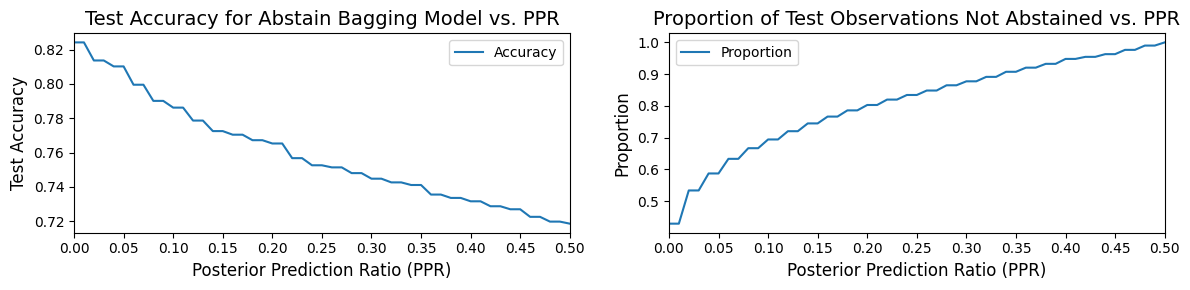

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,3))

# get x data(ppr) and y data(test accuracies and proportions)
x_data = np.linspace(0, 0.5, 51)
y1_data = []    # test accuracies
y2_data = []    # proportions
for p in x_data:
    y1,y2 = abstain_bagging_model(p)
    y1_data.append(y1)
    y2_data.append(y2)

# plot the test accuracies for an abstain bagging model
ax[0].set_title(f'Test Accuracy for Abstain Bagging Model vs. PPR', fontsize=TITLE_FONTSIZE)
ax[0].set_xlabel('Posterior Prediction Ratio (PPR)', fontsize=AXIS_LABEL_SIZE)
ax[0].set_xticks(np.linspace(0,0.5,11))
ax[0].set_xlim(xmin=0, xmax=0.5)
ax[0].set_ylabel('Test Accuracy', fontsize=AXIS_LABEL_SIZE)
ax[0].plot(x_data, y1_data, label='Accuracy')
ax[0].legend()

# plot the proportion of test observations not abstained
ax[1].set_title(f'Proportion of Test Observations Not Abstained vs. PPR', fontsize=TITLE_FONTSIZE)
ax[1].set_xlabel('Posterior Prediction Ratio (PPR)', fontsize=AXIS_LABEL_SIZE)
ax[1].set_xticks(np.linspace(0,0.5,11))
ax[1].set_xlim(xmin=0, xmax=0.5)
ax[1].set_ylabel('Proportion', fontsize=AXIS_LABEL_SIZE)
ax[1].plot(x_data, y2_data, label='Proportion')
ax[1].legend()

fig.tight_layout()
fig.subplots_adjust(hspace=0.3,wspace=0.2)
fig.show()


**INTERPRETATION:**

From graph 1, we can see that as PPR increases the accuracy decreases. As shown by graph 2, we can see as the PPR increases the portion of test observations not abstained will increase. We can therefore infer that as the portion of test observations not abstained increases, the test oberserbations abstain decreases, so the accuracy deacreases.